## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Seaborn to setup over matplotlib
sns.set()
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv('insurance.csv')

# Let's explore the top 5 rows of the df
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Inspect the data

In [4]:
data.isnull().sum()
#Incase of null values, use folloing to remove such columns. Can be used if onlya small portion will be elimnated.
#data_no_null = data.dropna(axis = 0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data['sex'] = data['sex'].replace(['male','female'],[0,1])
data['smoker'] = data['smoker'].replace(['no','yes'],[0,1])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [6]:
#To ensure data is balanced, we count occurence of each region

data.groupby('region').count()


,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [7]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [8]:
#To ensure data is balanced, we count occurence of each gender
data.groupby('sex').count()

,age,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
sex,,,,,,,,
0,676,676,676,676,676,676,676,676
1,662,662,662,662,662,662,662,662


In [9]:
#To ensure data is balanced, we count occurence of smoker y/n
data.groupby('smoker').count()

,age,sex,bmi,children,charges,region_northwest,region_southeast,region_southwest
smoker,,,,,,,,
0,1064,1064,1064,1064,1064,1064,1064,1064
1,274,274,274,274,274,274,274,274


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

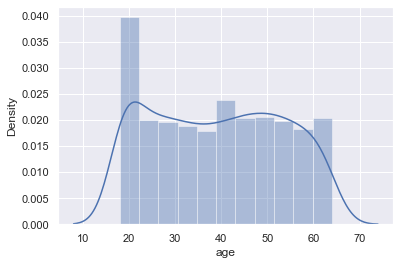

In [322]:

#Check pdf of each feature to ensure normal or near normal distribution
sns.distplot(data['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

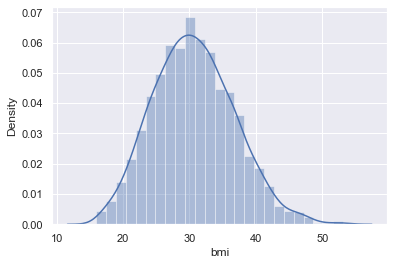

In [323]:
sns.distplot(data['bmi'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children', ylabel='Density'>

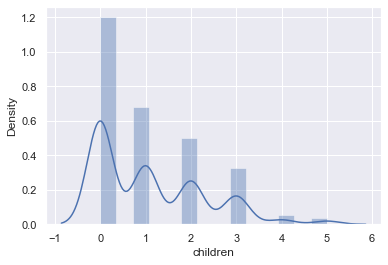

In [324]:
sns.distplot(data['children'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children', ylabel='Density'>

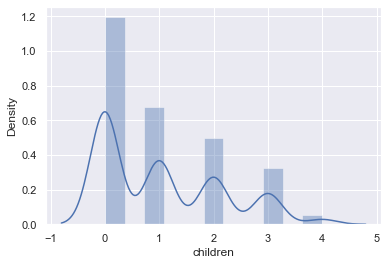

In [325]:
#We try to remove right skew a little
q = data['children'].quantile(0.99)
data = data[data['children']<q]
sns.distplot(data['children'])

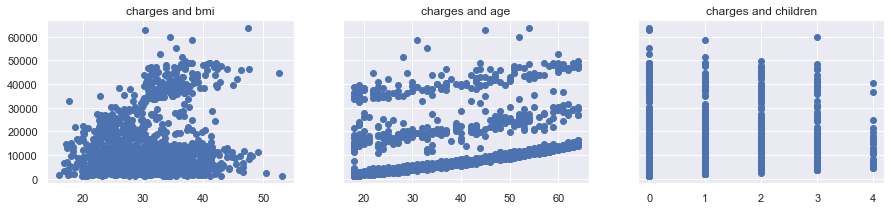

In [326]:
# Let's check the three scatters for linear relation
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data['bmi'],data['charges'])
ax1.set_title('charges and bmi')
ax2.scatter(data['age'],data['charges'])
ax2.set_title('charges and age')
ax3.scatter(data['children'],data['charges'])
ax3.set_title('charges and children')


plt.show()

In [327]:
log_charges = np.log(data['charges'])
#Checked output with and without log. With log gives better score
# Then we add it to our data frame
data['log_charges'] = log_charges
#data['log_charges'] = data['charges']

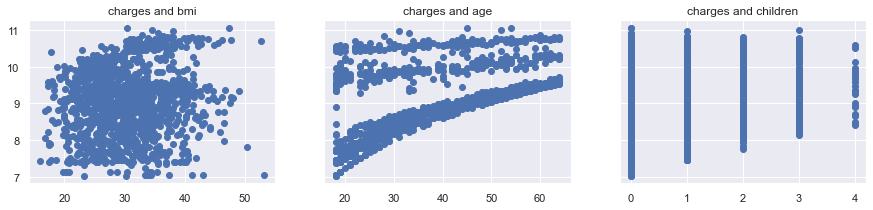

In [328]:
# Let's check the three scatters for linear relation
#BMI doesnt seemto have a linear relation. We'll see how the model handles it
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data['bmi'],data['log_charges'])
ax1.set_title('charges and bmi')
ax2.scatter(data['age'],data['log_charges'])
ax2.set_title('charges and age')
ax3.scatter(data['children'],data['log_charges'])
ax3.set_title('charges and children')


plt.show()

In [329]:

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
data = data.drop(['charges'],axis=1)#Since we are working with log_charges
data.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,log_charges
0,19,1,27.90,0,1,0,0,1,9.73
1,18,0,33.77,1,0,0,1,0,7.45
2,28,0,33.00,3,0,0,1,0,8.40
3,33,0,22.70,0,0,1,0,0,10.00
4,32,0,28.88,0,0,1,0,0,8.26


In [330]:
#Cheack for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data.drop(['log_charges'],axis=1)

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns
vif

,VIF,Features
0,7.78,age
1,1.92,sex
2,11.12,bmi
3,1.86,children
4,1.26,smoker
5,1.90,region_northwest
6,2.26,region_southeast
7,1.95,region_southwest


In [331]:
#VIF highest for BMI,we checked by removing BMI and keeping, result is: doesn't matter much. Weight given by model is small enough to adjust it. Keeping for reference
data = data.drop(['bmi'],axis=1)
variables = data.drop(['log_charges'],axis=1)

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,4.01,age
1,1.85,sex
2,1.80,children
3,1.24,smoker
4,1.71,region_northwest
5,1.77,region_southeast
6,1.70,region_southwest


# Linear Regression Model Starts


In [332]:
# The target(s) (dependent variable) is 'log price'
targets = data['log_charges']

inputs = data.drop(['log_charges'],axis=1)

In [333]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
# Scale the features and store them in a new variable 
inputs_scaled = scaler.transform(inputs)

In [334]:
#Split data into 80-20 model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2)

In [335]:
# Linear regression model
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

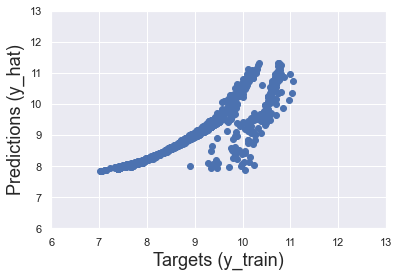

In [336]:
#Checking prediction in train
y_pred = reg.predict(x_train)
plt.scatter(y_train, y_pred)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

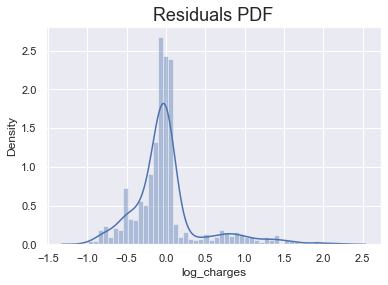

In [337]:
sns.distplot(y_train - y_pred)

# Include a title
plt.title("Residuals PDF", size=18)

In [338]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.760726126959655

In [339]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,age,0.49
1,sex,0.04
2,children,0.13
3,smoker,0.63
4,region_northwest,-0.02
5,region_southeast,-0.04
6,region_southwest,-0.04


### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [340]:
# Finding the R2
r2 = reg.score(x_train,y_train)

n = x_train.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = x_train.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7591279236091947

# Testing

In [341]:
y_pred_test = reg.predict(x_test)

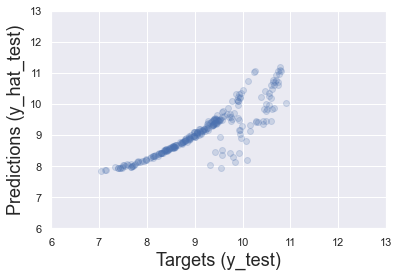

In [342]:
plt.scatter(y_test, y_pred_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [343]:
df_pf = pd.DataFrame(np.exp(y_pred_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,72283.69
1,60580.23
2,13593.60
3,11896.40
4,7980.12


In [344]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,72283.69,47928.03
1,60580.23,27808.73
2,13593.60,12094.48
3,11896.40,12622.18
4,7980.12,7537.16
5,11655.05,33471.97
6,4570.19,20277.81
7,7458.96,7160.33
8,40341.67,46200.99
9,4211.73,14426.07


In [345]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,72283.69,47928.03,-24355.66,50.82
1,60580.23,27808.73,-32771.50,117.85
2,13593.60,12094.48,-1499.12,12.40
3,11896.40,12622.18,725.78,5.75
4,7980.12,7537.16,-442.96,5.88
5,11655.05,33471.97,21816.92,65.18
6,4570.19,20277.81,15707.62,77.46
7,7458.96,7160.33,-298.63,4.17
8,40341.67,46200.99,5859.31,12.68
9,4211.73,14426.07,10214.34,70.80


In [346]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,264.00,264.00,264.00,264.00
mean,12431.66,13499.61,1067.95,23.42
std,12713.00,12140.31,7634.33,26.14
min,2564.72,1137.01,-33413.35,0.03
25%,4939.29,4905.71,-788.71,4.86
50%,8307.07,9325.48,-306.84,10.75
75%,13177.55,17430.30,612.30,35.65
max,72283.69,55135.40,32739.60,125.57


In [347]:
pd.options.display.max_rows = 999
# display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#sort by difference in %
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
261,7149.31,7147.47,-1.84,0.03
140,14481.64,14451.84,-29.80,0.21
153,8540.99,8569.86,28.87,0.34
201,9828.37,9877.61,49.24,0.50
43,6355.95,6389.38,33.43,0.52
37,15729.19,15817.99,88.79,0.56
239,6355.95,6393.60,37.65,0.59
194,8488.50,8539.67,51.17,0.60
250,14998.95,14901.52,-97.43,0.65
234,5306.67,5272.18,-34.49,0.65
